mean_squared_error :  293.00611265788774
mean_absolute_error :  14.244509188375442


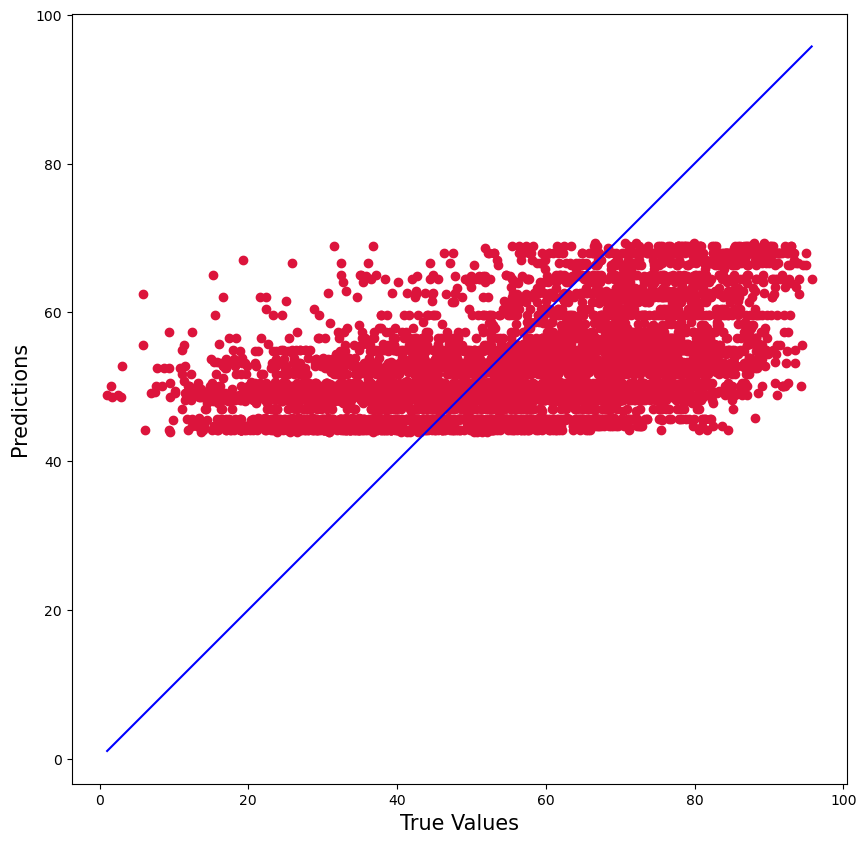

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_firm = pd.read_csv("Firm Data.csv")
# Lets rename some columns
df_firm.rename(
    columns={
        "Total CO2 Equivalent Emissions To Revenues USD in million": "CO2 Emissions",
        "Property Plant And Equipment, Total - Gross": "PPE Total",
    },
    inplace=True,
)
columns_to_impute = [
    "Total Current Assets",
    "Total Current Liabilities",
    "Total Debt",
    "Total Assets, Reported",
    "Net Income - Actual",
    "Revenue Per Share",
    "Total Revenue",
    "Total Equity",
    "CO2 Emissions",
    "Company Market Capitalization",
    "PPE Total",
    "P/E (Daily Time Series Ratio)",
]
df_firm = df_firm[df_firm["ESG Score"].notna()]
df_firm = df_firm.dropna(
    subset=columns_to_impute,
    how="all"
)
df_firm.shape

df_firm[columns_to_impute] = df_firm.groupby(["RIC"])[
    columns_to_impute].transform(lambda x: x.fillna(x.mean()))
df_firm.shape

df_firm[df_firm['PPE Total'].notna()].isna().sum()
df_firm=df_firm.fillna(df_firm.mean())
df_firm[df_firm['PPE Total'].notna()].isna().sum()
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
columns_selected = [
    "Total Equity",
    "CO2 Emissions",
    "Company Market Capitalization",
    "PPE Total",
    "P/E (Daily Time Series Ratio)",
]
X = df_firm[columns_selected]
y = df_firm['ESG Score']
# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train,y_train)


# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores  


y_pred = model.predict(X_test)
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))



plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()